# Домашнее задание №1

Темы "Введение в МатСтат" и "Виды статистических оценок и характеристики"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов

Список заданий:
1. Посчитайте кол-во уникальных жанров.  
2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме `type`.  
3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам `genre`.  
4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам `genre` и типу аниме `type`.  
5. Насколько часто встречаются аниме с одним или двумя жанрами?  
6. Сколько в среднем эпизодов приходится на аниме типа == `TV`?  
7. По правилу трех сигм на столбцах `episodes`, `rating` и `members` оцените кол-во аномалий.  
  - если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным
8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков.  
9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме `type`.  
10. Оцените и визуализируйте корреляцию длины названия аниме `name` с его рейтингом, кол-вом жанров, эпизодов и подписчиков.  



In [2]:
import numpy as np
import pandas as pd

# Не обязательно, можно использовать любую удобную вам библиотеку для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# FIXED VERSION: Correct logic for genre amount
exp_genre_df = genre_df.copy()
exp_genre_df['genre_amount'] = exp_genre_df['genre_list'].apply(lambda x: len(x) if pd.notna(x) else 0)
exp_genre_df


In [ ]:
# CORRECTED VERSION: Fix syntax and column name
# Option 1: If you want to filter by a specific type (e.g., 'TV')
exp_genre_df[exp_genre_df['type'] == 'TV'][['genre_amount', 'rating', 'members']]

# Option 2: If you want to see all types
exp_genre_df[['type', 'genre_amount', 'rating', 'members']]

# Option 3: If you want to group by type
exp_genre_df.groupby('type')[['genre_amount', 'rating', 'members']].describe()


In [3]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> ./datasets/anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0   402k      0  0:00:01  0:00:01 --:--:--  402k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [4]:
df = pd.read_csv('./datasets/anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [5]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## 1. Посчитайте кол-во уникальных жанров.  

In [6]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Drama, Fantasy, Romance, Sci-Fi',
       'Action, Fantasy, Magic, Sci-Fi, Shounen', 'Magic, Military'],
      dtype=object)

In [7]:
filtered_genre = df['genre'].str.split(',').explode().str.strip().dropna()

filtered_genre.unique()

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Josei', 'Shounen Ai', 'Game',
       'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai'], dtype=object)

### Final answer

In [8]:
filtered_genre.nunique()

39

## 2. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по типу аниме type.  

In [9]:
df['type'].dropna().unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [10]:
groups = df.dropna(subset=["rating"]).groupby('type')
groups

In [11]:
ratings = groups['rating'].describe()
ratings

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Movie,2259.0,6.311996,1.213470,2.49,5.40,6.450,7.25,10.00
Music,486.0,5.584259,0.956994,3.28,5.01,5.615,6.15,8.38
ONA,637.0,5.633297,1.131859,2.58,4.86,5.750,6.41,8.26
OVA,1937.0,6.474058,0.925699,2.00,5.89,6.460,7.11,9.25
Special,1523.0,6.523434,0.913829,1.67,6.05,6.630,7.14,8.66
TV,3433.0,6.900149,0.879673,2.67,6.43,6.940,7.47,9.60


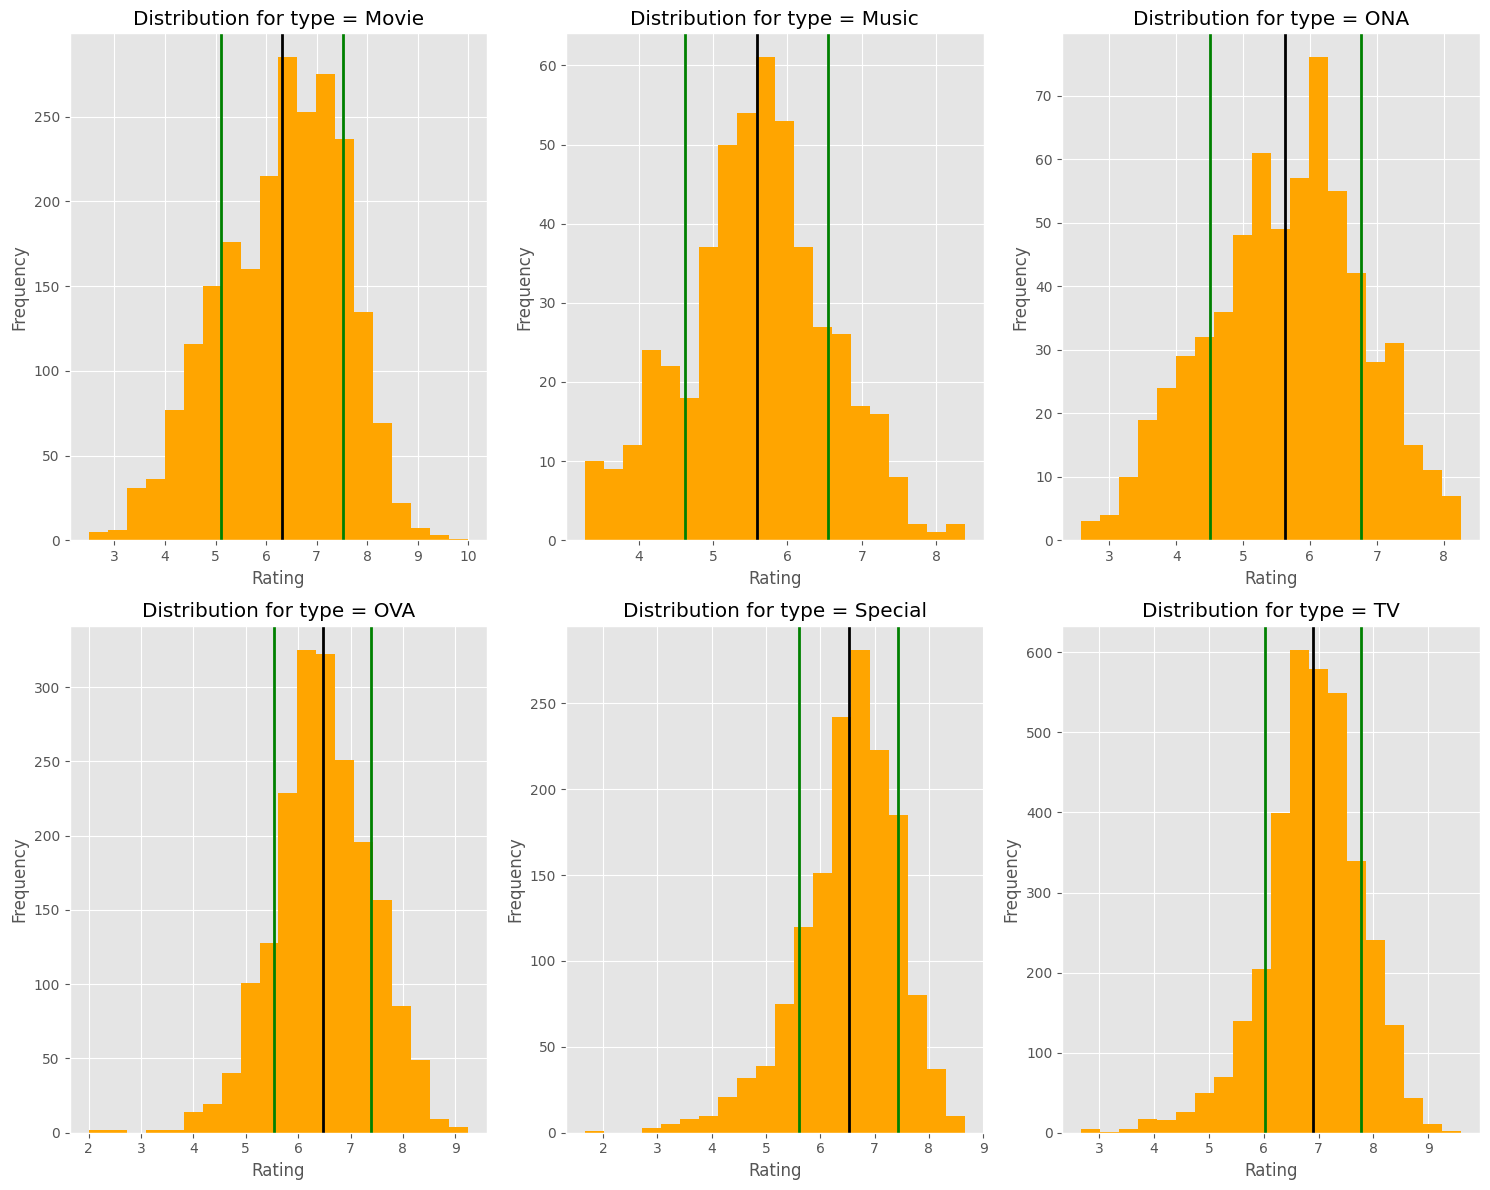

In [12]:
def plot_rating_distribution(groups):
    fig, axes = plt.subplots(
        nrows=len(groups) // 3, 
        ncols=3, 
        figsize=(15, 2 * len(groups))
    )

    axes = axes.flatten()

    for ax, (name, group) in zip(axes, groups):
        group["rating"].plot(
            kind="hist",
            bins=20,
            ax=ax,
            color="orange"
        )

        ax.axvline(x=group["rating"].mean(), color="black", linestyle="-", linewidth=2)

        ax.axvline(x=group["rating"].mean() - group["rating"].std(), color="green", linestyle="-", linewidth=2)
        ax.axvline(x=group["rating"].mean() + group["rating"].std(), color="green", linestyle="-", linewidth=2)


        ax.set_title(f"Distribution for type = {name}")
        ax.set_xlabel("Rating")
        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_rating_distribution(groups)

## 3. Посчитайте и визуализируйте средний рейтинг и стандартное отклонение по жанрам.  
График постройте для топ-15 жанров по рейтингу

In [36]:
genre_df = df.copy()
genre_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
10481,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169
10482,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
10483,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
10484,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


In [37]:
genre_df['genre_list'] = df['genre'].str.split(',')
genre_df['genre_list'] = genre_df['genre_list'].dropna().apply(lambda x: [i.strip().lower() for i in x])

genre_df

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[drama, romance, school, supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[action, adventure, drama, fantasy, magic, mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[action, comedy, historical, parody, samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[sci-fi, thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ..."
...,...,...,...,...,...,...,...,...
10481,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169,"[comedy, kids, supernatural]"
10482,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593,"[drama, fantasy, magic, slice of life]"
10483,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439,"[drama, fantasy, magic, slice of life]"
10484,33035,Yuyushiki Special,NaN,Special,1,NaN,2294,NaN


In [38]:
exploded_genre_df = genre_df.explode('genre_list').dropna().reset_index().pivot(columns='genre_list', values='rating')
exploded_genre_df

genre_list,action,adventure,cars,comedy,dementia,demons,drama,fantasy,game,harem,...,shoujo ai,shounen,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire
0,NaN,NaN,NaN,NaN,NaN,NaN,9.37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.37,NaN,NaN
4,9.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30836,NaN,NaN,NaN,6.13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
top_genres = exploded_genre_df[filtered_genre.str.lower()].sum().drop_duplicates().sort_values(ascending=False).head(15)
top_genres.index

Index(['comedy', 'action', 'adventure', 'fantasy', 'drama', 'sci-fi',
       'shounen', 'kids', 'romance', 'slice of life', 'school', 'supernatural',
       'mecha', 'historical', 'music'],
      dtype='object', name='genre_list')

In [17]:
new_genre_df = genre_df.copy()
new_genre_df

genre_list,action,adventure,cars,comedy,dementia,demons,drama,fantasy,game,harem,...,shoujo ai,shounen,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire
0,NaN,NaN,NaN,NaN,NaN,NaN,9.37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.37,NaN,NaN
4,9.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30836,NaN,NaN,NaN,6.13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
new_genre_df[top_genres.index].describe()

genre_list,comedy,action,adventure,fantasy,drama,sci-fi,shounen,kids,romance,slice of life,school,supernatural,mecha,historical,music
count,4050.000000,2539.000000,2231.000000,2056.000000,1887.000000,1896.000000,1563.000000,1575.000000,1156.000000,1162.000000,931.000000,859.000000,892.000000,781.000000,830.000000
mean,6.622348,6.808614,6.747665,6.675725,6.994149,6.709272,7.060198,6.101448,7.064291,6.726773,7.016273,7.037846,6.653543,6.762330,5.915880
std,1.021482,0.946312,0.877990,0.915247,0.888470,0.897169,0.837901,1.024731,0.793598,1.034183,0.814881,0.949181,0.915282,1.015627,1.121173
min,2.140000,2.490000,3.170000,2.550000,3.330000,1.670000,3.110000,2.670000,2.930000,1.670000,3.900000,3.280000,2.000000,2.840000,2.550000
25%,6.060000,6.300000,6.310000,6.150000,6.430000,6.220000,6.670000,5.450000,6.580000,6.130000,6.510000,6.460000,6.240000,6.210000,5.160000
50%,6.740000,6.910000,6.790000,6.740000,7.040000,6.770000,7.130000,6.200000,7.135000,6.800000,7.070000,7.160000,6.730000,6.780000,5.925000
75%,7.340000,7.440000,7.320000,7.300000,7.590000,7.290000,7.560000,6.750000,7.590000,7.490000,7.595000,7.710000,7.250000,7.460000,6.747500
max,10.000000,9.260000,9.600000,9.260000,9.370000,9.250000,9.260000,9.600000,9.370000,9.500000,9.370000,9.370000,8.980000,9.330000,8.920000


## 4. Посчитайте и визуализируйте квартили Q1, Q2 и Q3 с интерквантильным размахом по жанрам genre и типу аниме type.  

### Genre division

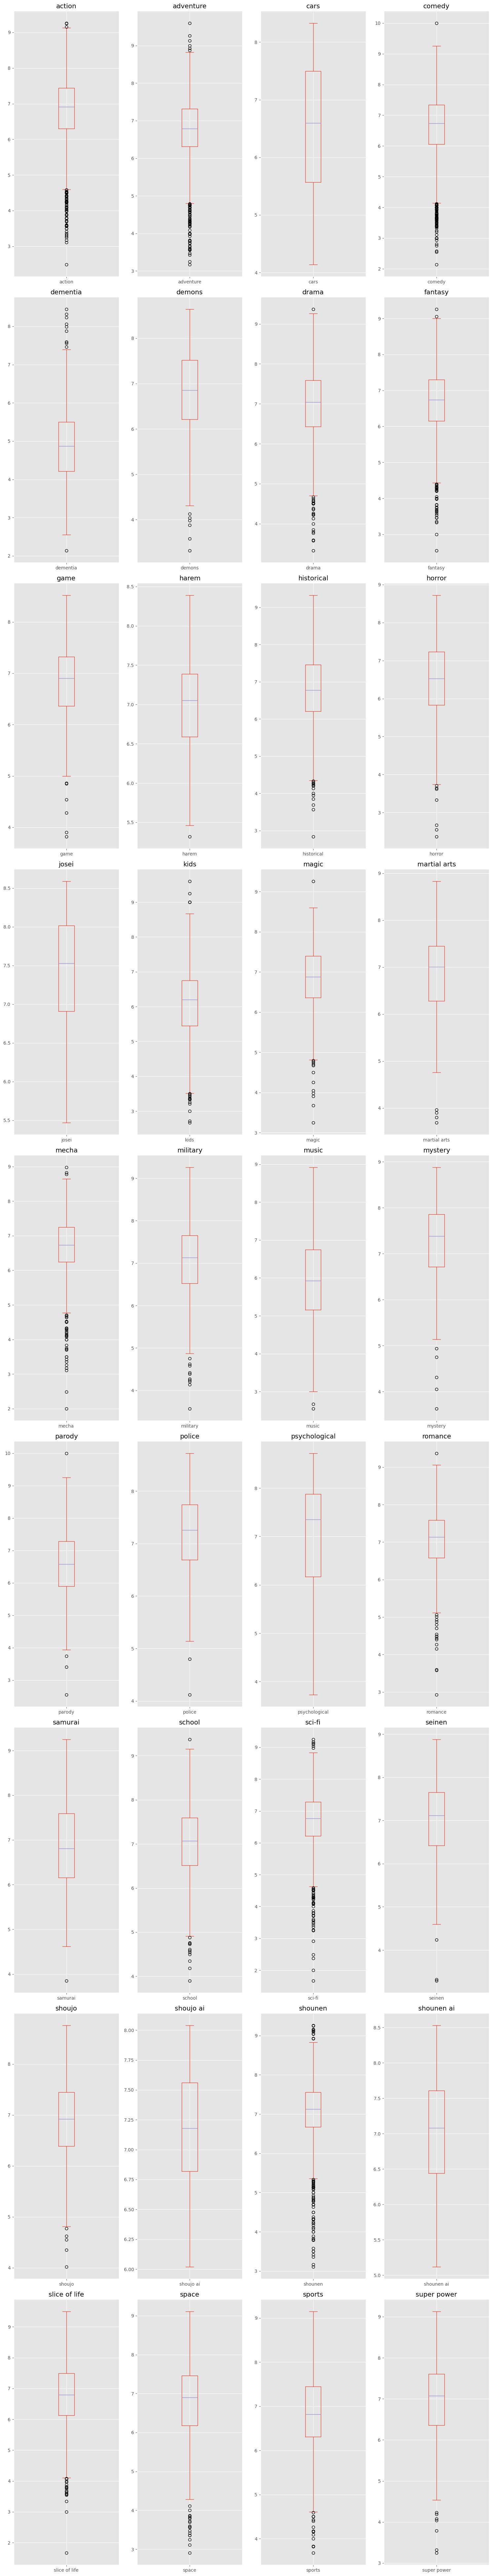

In [19]:
def plot_box_plots_on_df(df):
    fig, axes = plt.subplots(
            nrows=len(df.columns) // 4, 
            ncols=4, 
            figsize=(15, 2 * len(df.columns))
        )

    axes = axes.flatten()

    for ax, el in zip(axes, df.columns):
        df[el].plot(kind='box', title=el, ax=ax)

    plt.tight_layout()
    plt.show()


plot_box_plots_on_df(new_genre_df)

### Type division

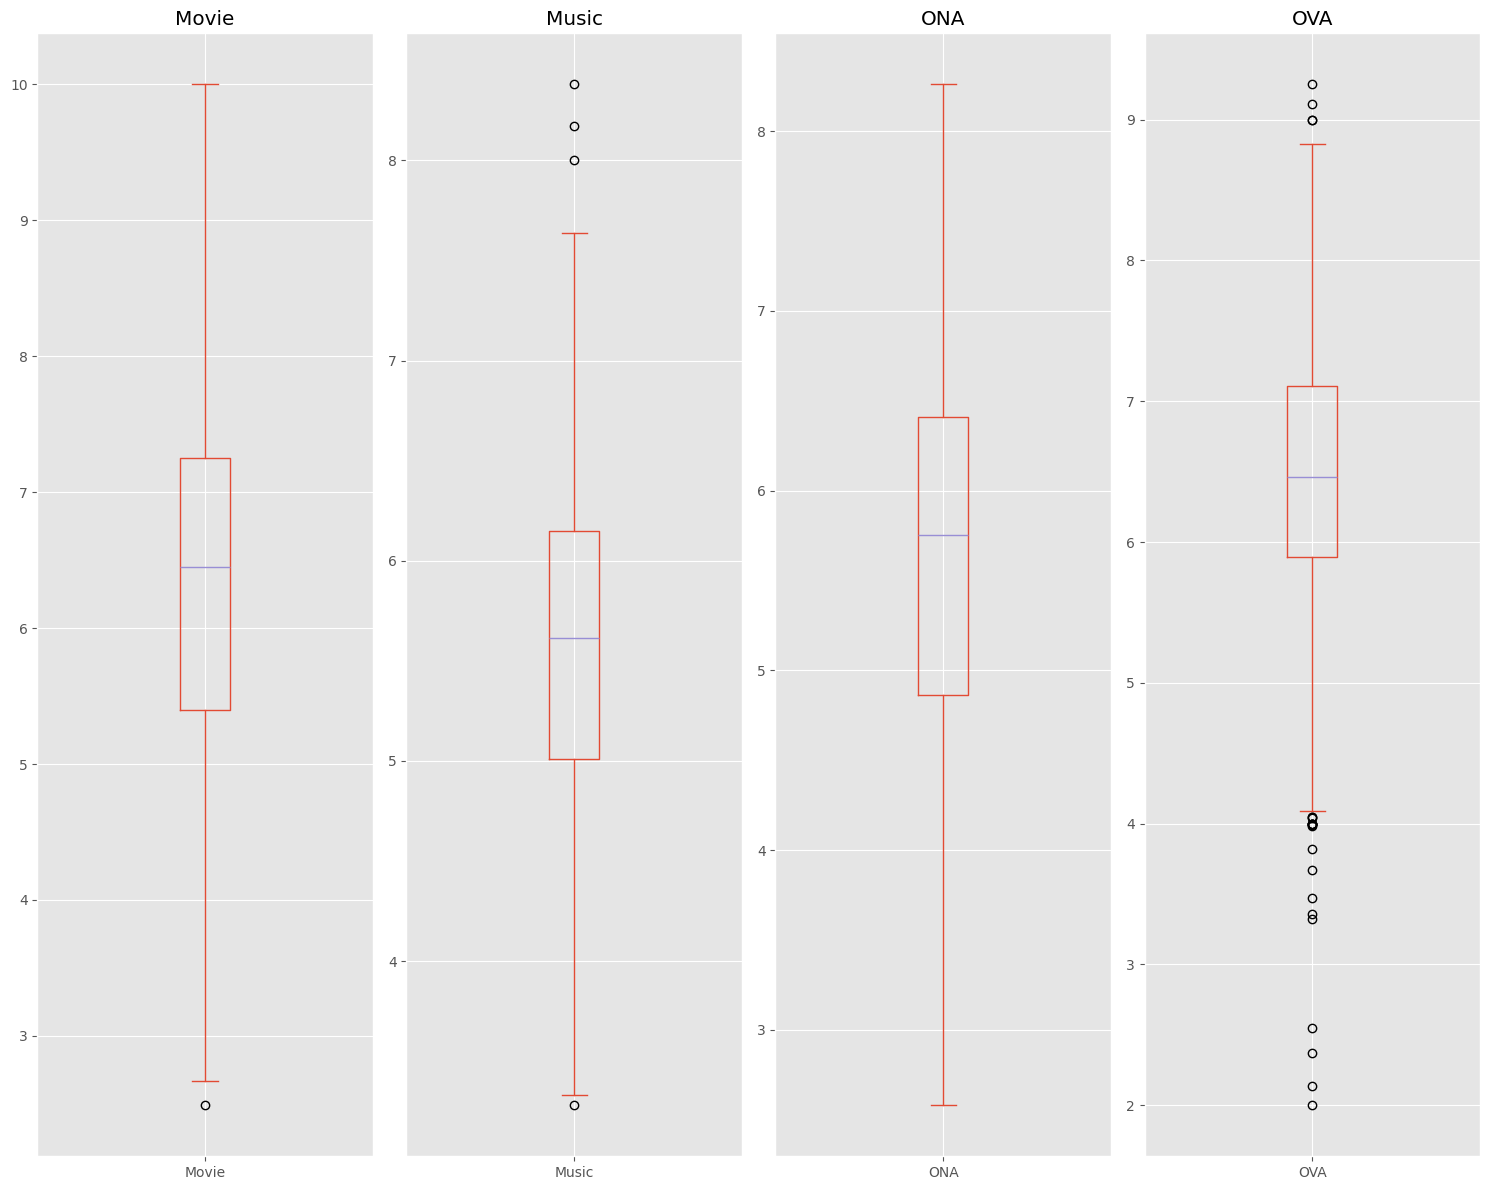

In [20]:
plot_box_plots_on_df(df.dropna(subset=["type"]).pivot(columns="type", values="rating"))

## 5. Насколько часто встречаются аниме с одним или двумя жанрами?  

In [21]:
df[df['genre'].str.count(',') <= 1].shape[0] / df.shape[0] * 100

42.30402441350372

In [22]:
df[df['genre'].str.count(',') == 1].shape[0] / df.shape[0] * 100

23.64104520312798

## 6. Сколько в среднем эпизодов приходится на аниме типа == TV?  

In [25]:
episodes_df = df.copy()

episodes_df['episodes'] = pd.to_numeric(episodes_df["episodes"], errors="coerce").dropna().astype(int)
episodes_df[episodes_df['type'] == 'TV']['episodes'].mean()

37.38192158036516

## 7. По правилу трех сигм на столбцах episodes, rating и members оцените кол-во аномалий.  
если по одному из столбцов аниме не попадает в интервал трех сигм, то оно считается аномальным


In [26]:
fixed_df = df.copy().set_index('anime_id')
fixed_df['episodes'] = pd.to_numeric(fixed_df["episodes"], errors="coerce").dropna().astype(int)
fixed_df['rating'] = pd.to_numeric(fixed_df["rating"], errors="coerce").dropna().astype(float)
fixed_df['members'] = pd.to_numeric(fixed_df["members"], errors="coerce").dropna().astype(int)

fixed_df = fixed_df[['episodes', 'rating', 'members']]
fixed_df


,episodes,rating,members
anime_id,,,
32281,1.0,9.37,200630
5114,64.0,9.26,793665
28977,51.0,9.25,114262
9253,24.0,9.17,673572
9969,51.0,9.16,151266
...,...,...,...
34471,1.0,NaN,169
34284,6.0,NaN,2593
34445,6.0,NaN,4439


In [27]:
sum = 0

for col in fixed_df.columns:
    col_df = fixed_df[col].dropna()

    mean = col_df.mean()
    std = col_df.std()

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    anomalies = col_df[(col_df <= lower_bound) | (col_df >= upper_bound)]

    sum += anomalies.shape[0]
    print(f"{col}: {anomalies.shape[0]}")

sum

episodes: 63
rating: 41
members: 218


322

## 8. Оцените и визуализируйте корреляцию среднего рейтинга жанра со средними кол-вом эпизодов и кол-вом подписчиков.  

In [28]:
genre_distributed_df = df.copy()
genre_distributed_df['genre_list'] = genre_distributed_df['genre'].str.split(',')
genre_distributed_df['genre_list'] = genre_distributed_df['genre_list'].dropna().apply(lambda x: [i.strip().lower() for i in x])


genre_distributed_df

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[drama, romance, school, supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[action, adventure, drama, fantasy, magic, mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[action, comedy, historical, parody, samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[sci-fi, thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ..."
...,...,...,...,...,...,...,...,...
10481,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169,"[comedy, kids, supernatural]"
10482,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593,"[drama, fantasy, magic, slice of life]"
10483,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439,"[drama, fantasy, magic, slice of life]"
10484,33035,Yuyushiki Special,NaN,Special,1,NaN,2294,NaN


In [29]:
CORE_COLUMNS = ['rating', 'episodes', 'members']

In [30]:
genre_distributed_exploded_df = (
    genre_distributed_df
    .dropna(subset=['genre_list'])
    .explode('genre_list')
    .reset_index(drop=True)
)[['genre_list', *CORE_COLUMNS]].rename(columns={'genre_list': 'genre'})

genre_distributed_exploded_df.dtypes

genre        object
rating      float64
episodes     object
members       int64
dtype: object

In [31]:
genre_distributed_exploded_df['episodes'] = pd.to_numeric(genre_distributed_exploded_df['episodes'], errors="coerce").dropna().astype(int)
genre_distributed_exploded_df['members'] = pd.to_numeric(genre_distributed_exploded_df['members'], errors="coerce").dropna().astype(int)
genre_distributed_exploded_df['rating'] = pd.to_numeric(genre_distributed_exploded_df['rating'], errors="coerce").dropna().astype(float)

genre_distributed_exploded_df.dtypes

genre        object
rating      float64
episodes    float64
members       int64
dtype: object

In [32]:
final_mean_list = []

for col in CORE_COLUMNS:
    current_pivoted = genre_distributed_exploded_df.pivot(columns='genre', values=col)
    final_mean_list.append(current_pivoted.mean().to_dict())

final_mean_df = pd.DataFrame(final_mean_list, index=CORE_COLUMNS).T
final_mean_df

,rating,episodes,members
action,6.808614,13.675294,32792.052047
adventure,6.747665,17.878038,18825.841663
cars,6.468611,18.366197,7133.861111
comedy,6.622348,18.471755,21461.513126
dementia,4.991617,1.825532,7336.552743
demons,6.745760,12.954545,34665.605381
drama,6.994149,11.000000,29214.025988
fantasy,6.675725,14.084343,23498.157075
game,6.812275,23.079755,34551.288235
harem,6.994859,10.345070,53905.798611


In [77]:
def print_correlation_heatmaps(df, subtitle="Correlation"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

    fig.suptitle(subtitle)

    ax1 = sns.heatmap(df.corr(method='pearson', numeric_only=True), ax=ax1, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
    ax1 = ax1.set_title('Pearson')

    ax2 = sns.heatmap(df.corr(method='spearman', numeric_only=True), ax=ax2, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
    ax2 = ax2.set_title('Spearman')

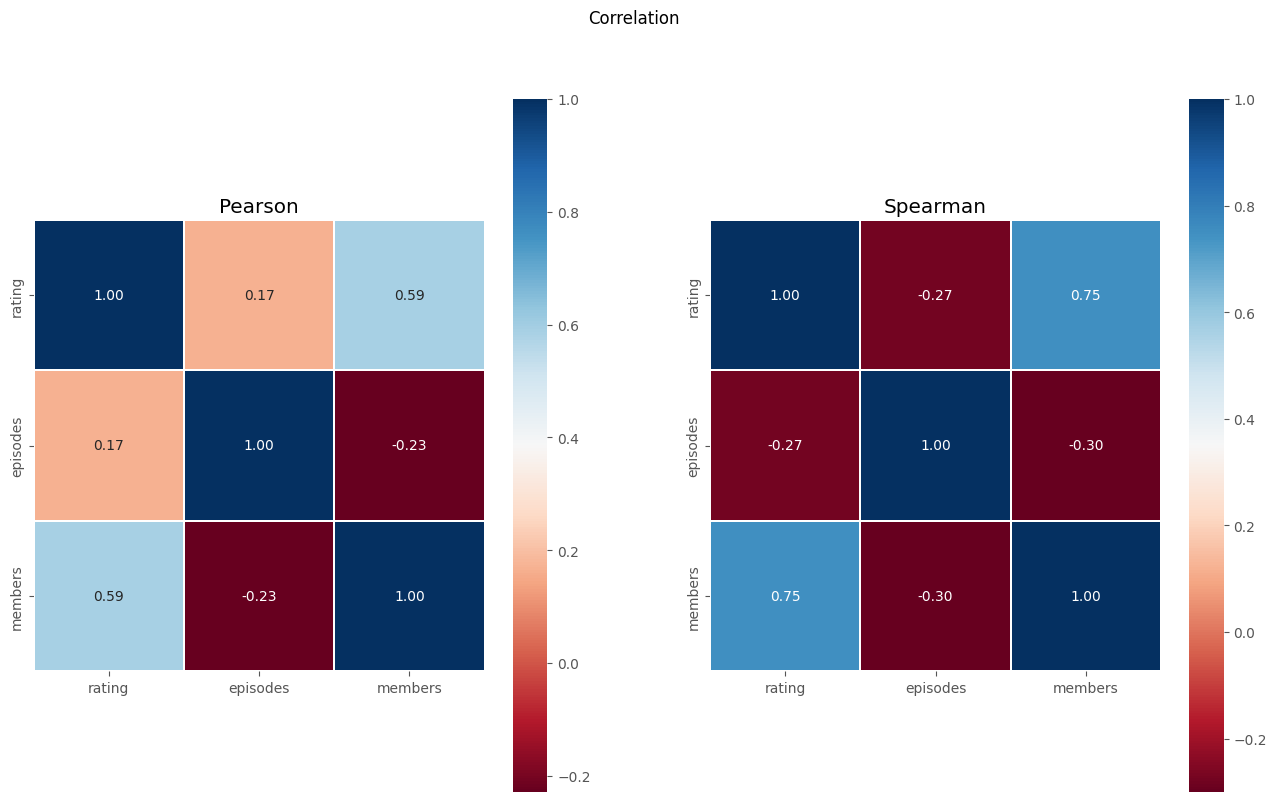

In [78]:
print_correlation_heatmaps(final_mean_df)

## 9. Оцените и визуализируйте корреляцию кол-ва жанров у аниме с его рейтингом и кол-вом подписчиков по каждому типу аниме type.  

In [74]:
exp_genre_df = genre_df.copy()
exp_genre_df['genre_amount'] = exp_genre_df['genre_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

exp_genre_df

,anime_id,name,genre,type,episodes,rating,members,genre_list,genre_amount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[drama, romance, school, supernatural]",4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[action, adventure, drama, fantasy, magic, mil...",7
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[action, comedy, historical, parody, samurai, ...",7
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[sci-fi, thriller]",2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ...",7
...,...,...,...,...,...,...,...,...,...
10481,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169,"[comedy, kids, supernatural]",3
10482,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593,"[drama, fantasy, magic, slice of life]",4
10483,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439,"[drama, fantasy, magic, slice of life]",4
10484,33035,Yuyushiki Special,NaN,Special,1,NaN,2294,NaN,0


/Users/simon/PycharmProjects/rec-sys-project/.venv/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/simon/PycharmProjects/rec-sys-project/.venv/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/Users/simon/PycharmProjects/rec-sys-project/.venv/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/simon/PycharmProjects/rec-sys-project/.venv/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


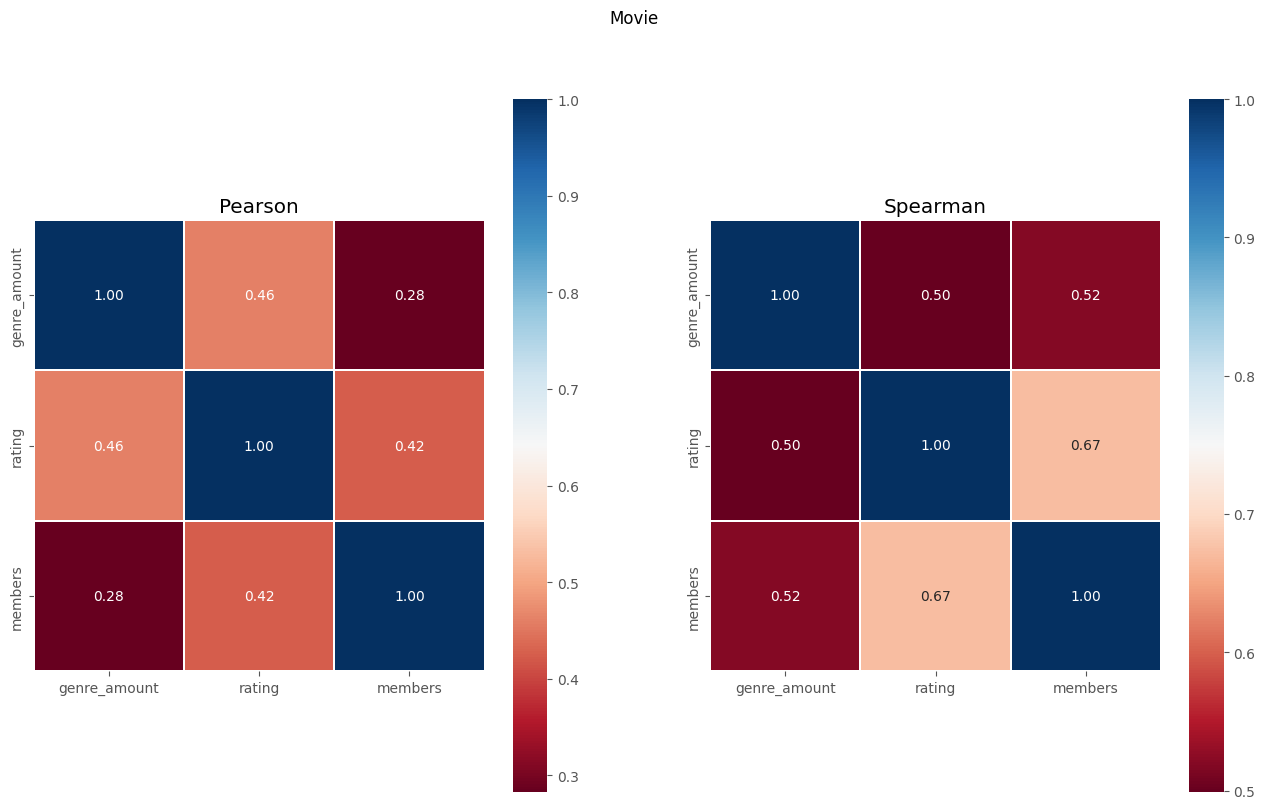

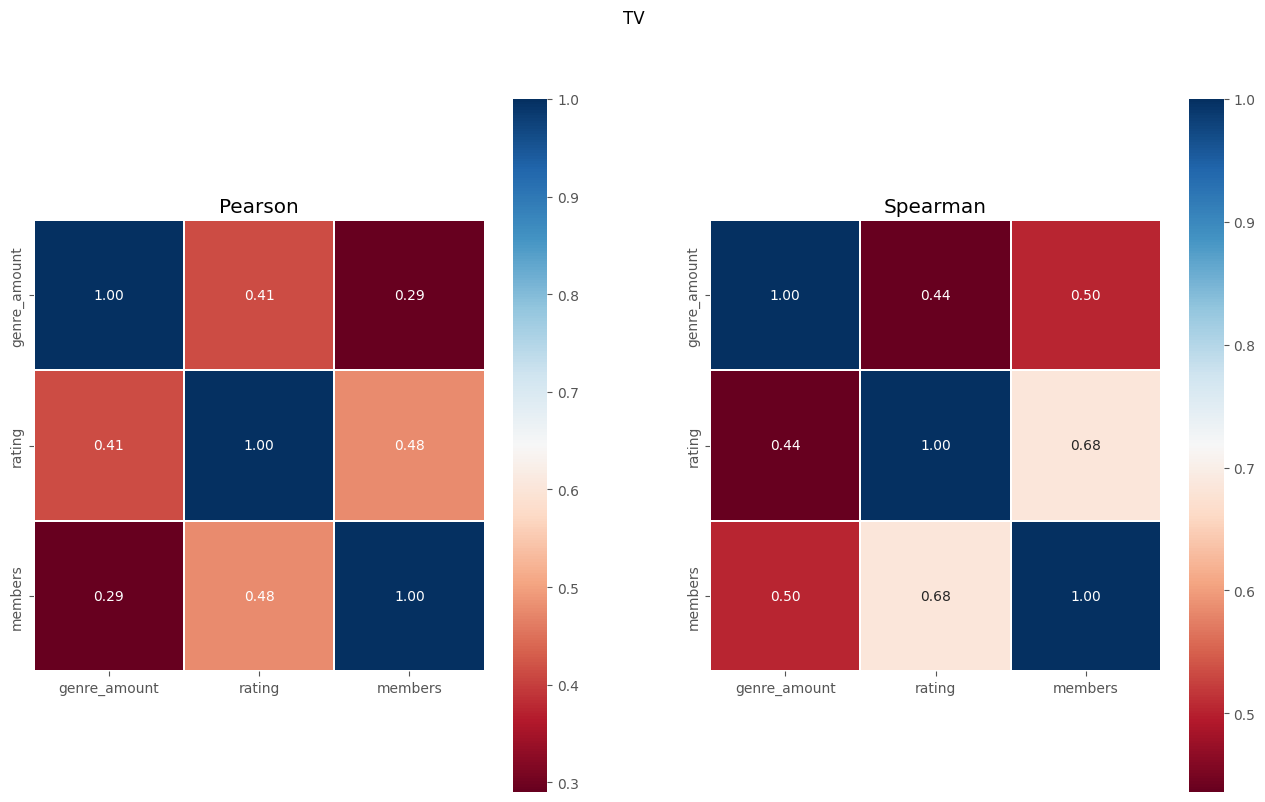

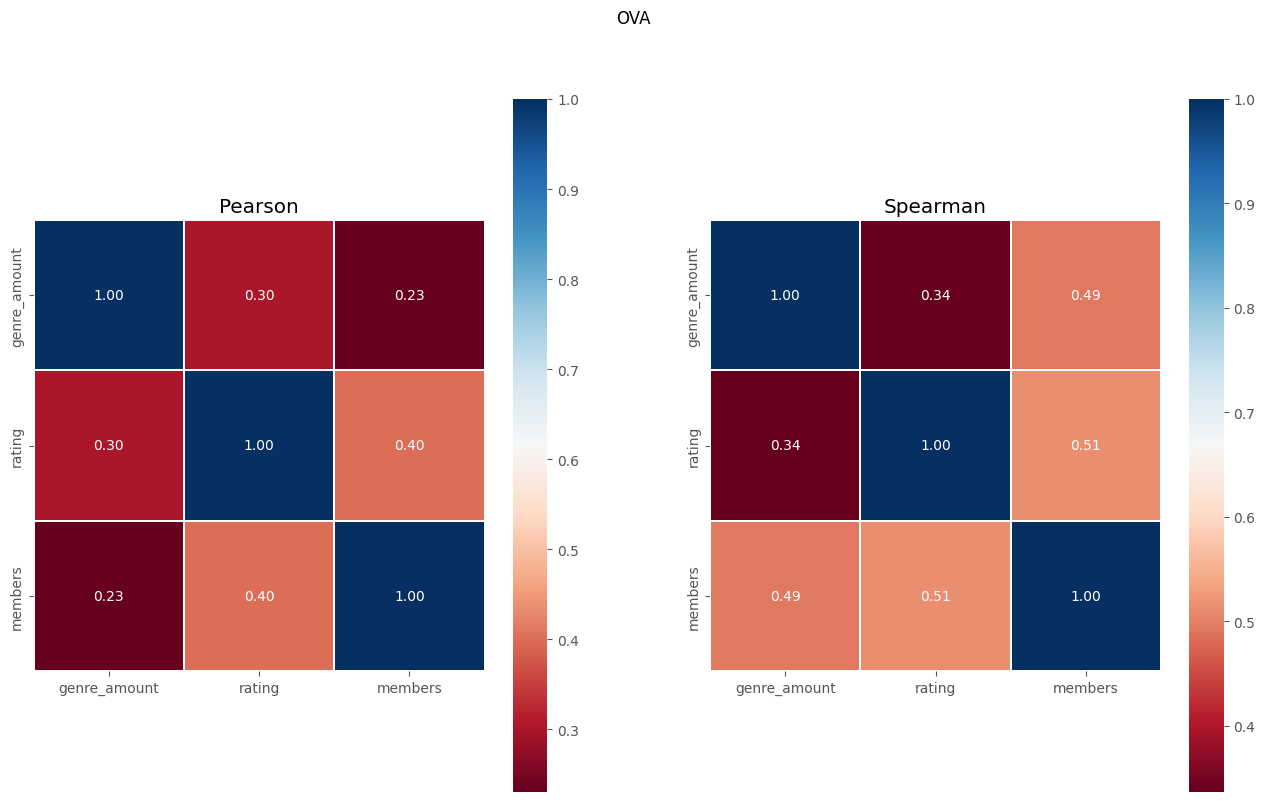

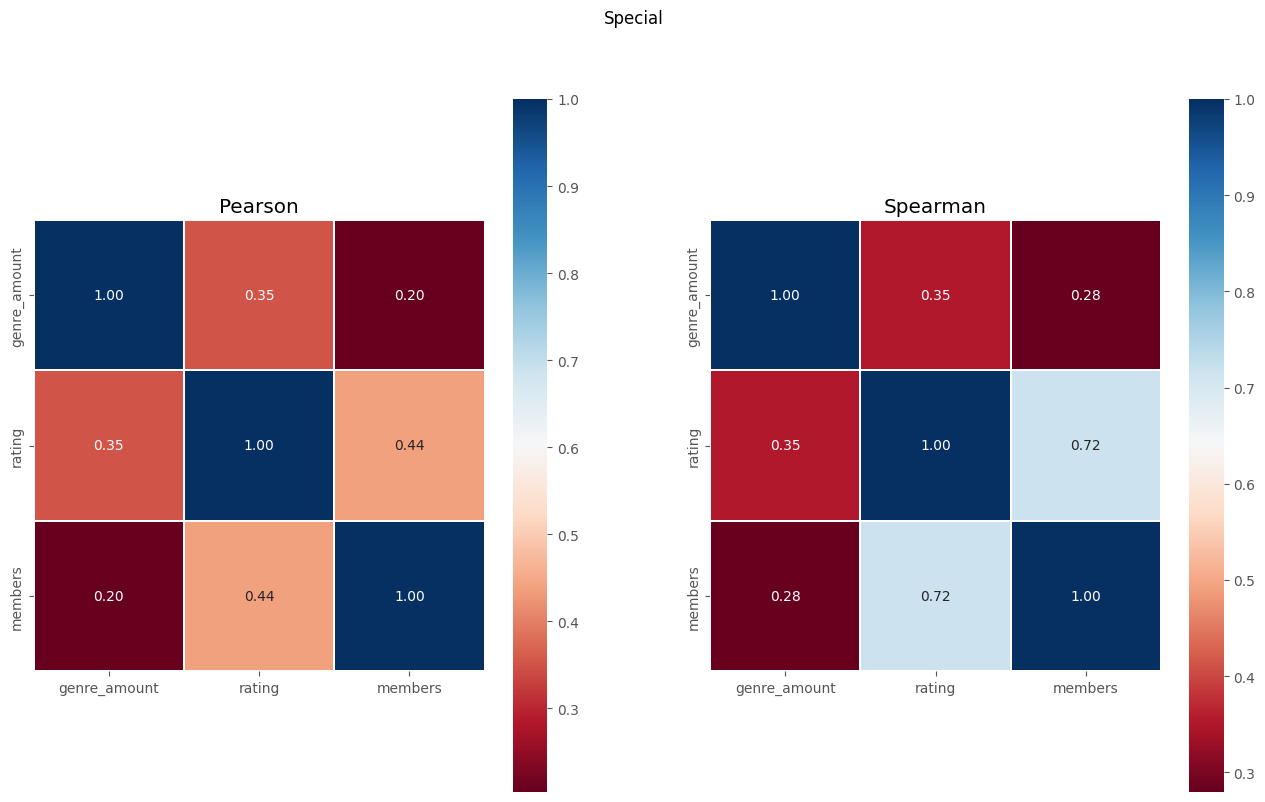

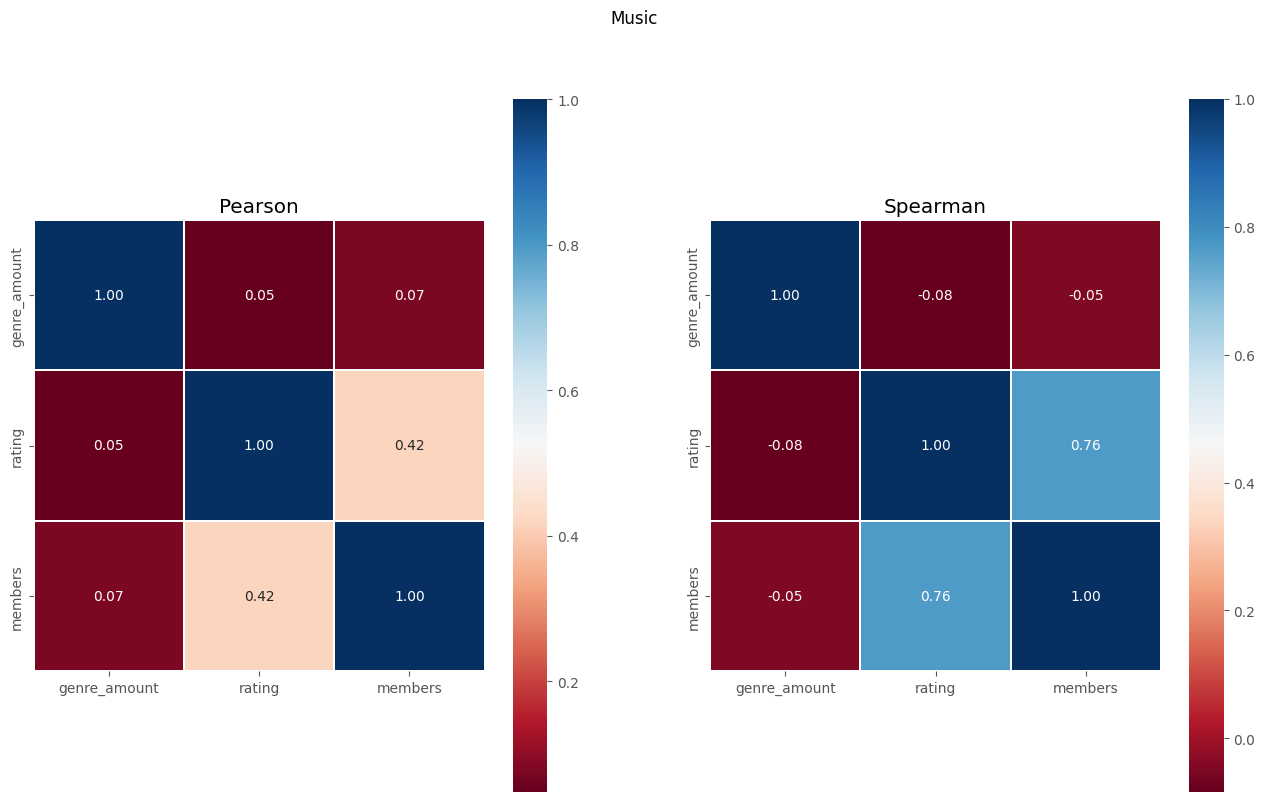

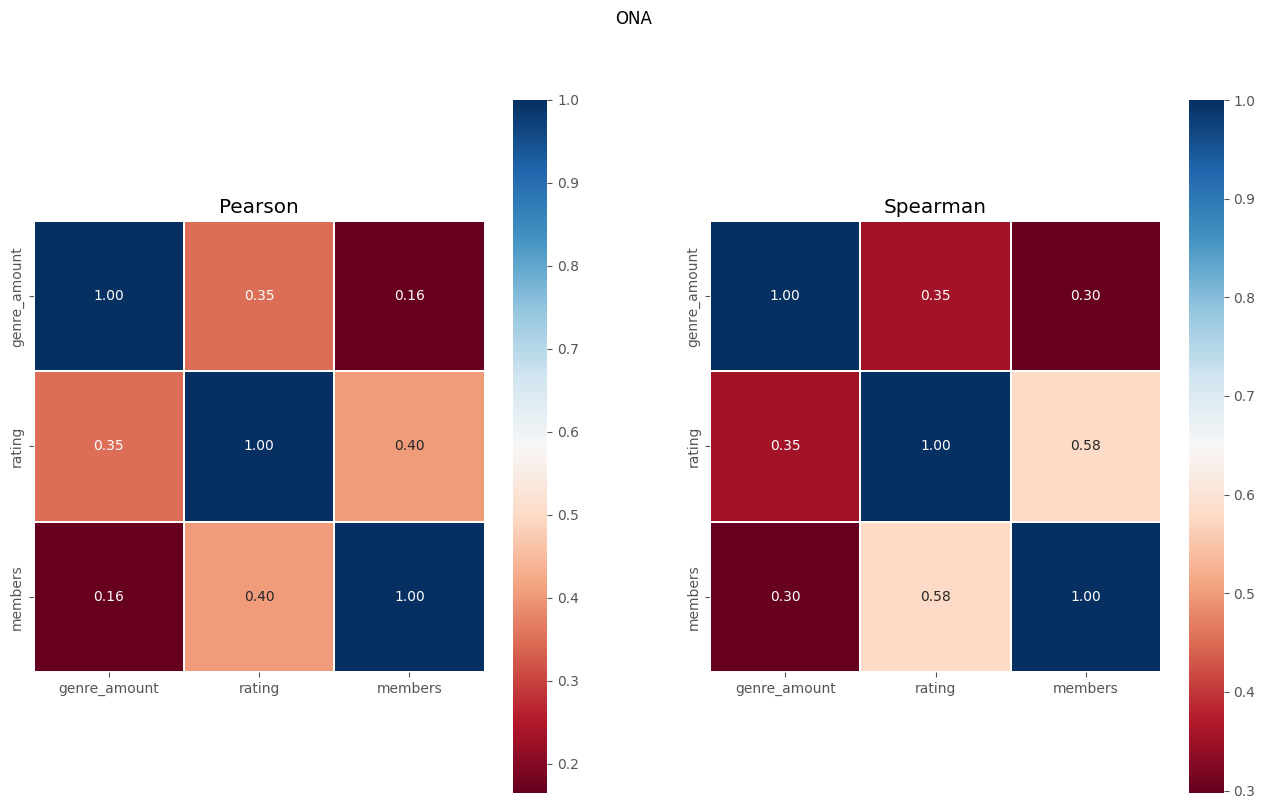

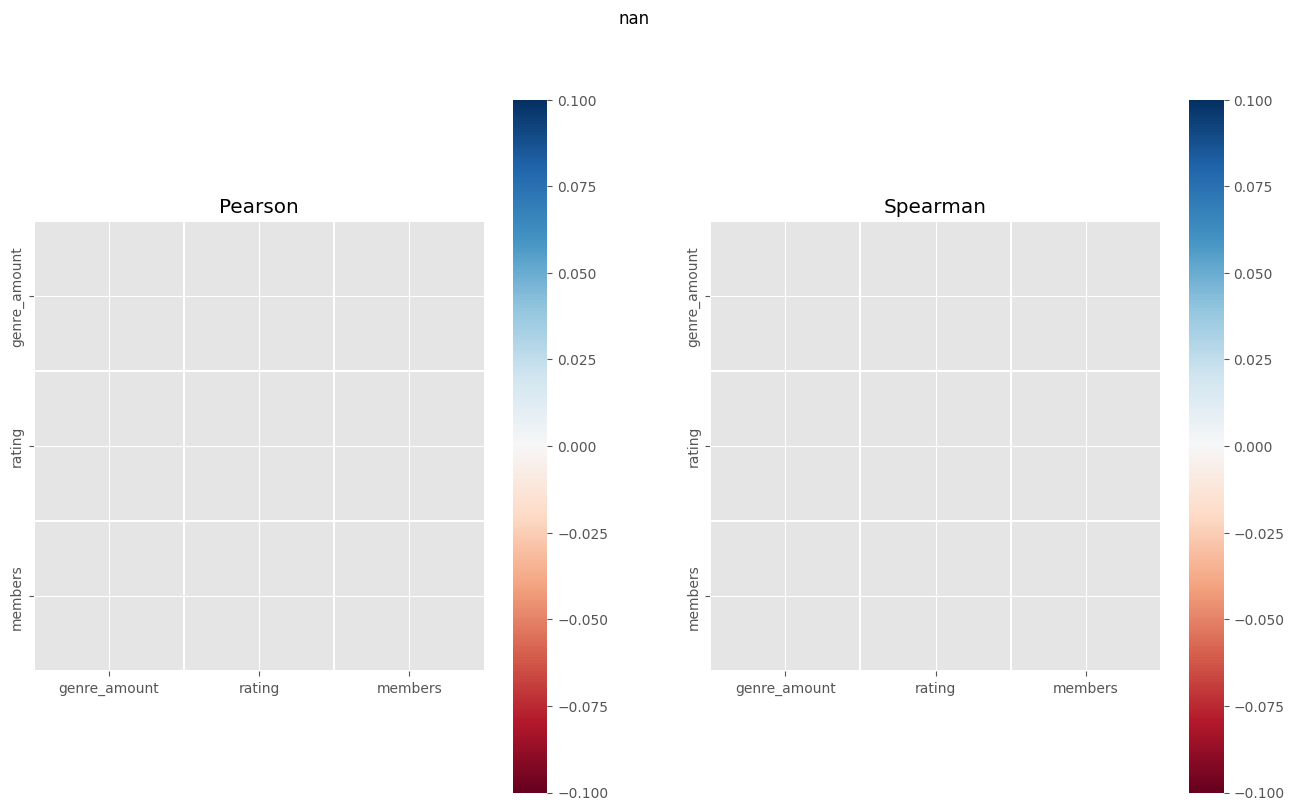

In [82]:
for t in exp_genre_df['type'].unique():
    print_correlation_heatmaps(exp_genre_df[exp_genre_df['type'] == t][['genre_amount', 'rating', 'members']].dropna(), subtitle=t)

## 10. Оцените и визуализируйте корреляцию длины названия аниме name с его рейтингом, кол-вом жанров, эпизодов и подписчиков.  

# 2. Часть

Каждое задание оценивается 1 баллом в случае полного выполнения

Обязательно фиксируем seed(42) и генерируем все выборки через numpy

In [ ]:
import random
import numpy as np
random.seed(42)
np.random.seed(42)

 ### Задание 11: Нормальное распределение  
Генерация данных \
Сгенерируйте выборку из 1000 элементов с нормальным распределением, где среднее  μ=5 и стандартное отклонение σ=1.5.
Описательная статистика \
Рассчитайте выборочное среднее, выборочную медиану, выборочную моду и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими. \
Анализ отклонений \
Рассчитайте частоту значений, которые отклоняются от среднего на более чем одно стандартное отклонение, и сравните это с теоретическим результатом для нормального распределения.

### Задание 12: Экспоненциальное распределение  
Генерация данных \
Сгенерируйте выборку из 1000 элементов из экспоненциального распределения с параметром λ=0.5. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление \
Постройте гистограмму и график плотности распределения. \
Анализ распределения \
Определите долю значений в выборке, которые больше двух выборочных средних, и сравните это с теоретической вероятностью для экспоненциального распределения. \


### Задание 13: Биномиальное распределение  
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из биномиального распределения с параметрами  n=10 и p=0.7 \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества успехов. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества успехов. \
Анализ вероятностей \
Вычислите вероятность того, что количество успехов будет больше 8, используя как выборочные данные, так и теоретическую вероятность биномиального распределения. Сравните результаты. \

### Задание 14: Геометрическое распределение  
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из геометрического распределения с вероятностью успеха p=0.3. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и моду количества попыток до первого успеха. \
Графическое представление \
Постройте гистограмму распределения количества попыток. \
Анализ вероятностей \
Определите вероятность того, что потребуется не более 5 попыток для первого успеха, используя как выборочные данные, так и теоретическое геометрическое распределение. Сравните результаты. \

### Задание 15: Равномерное распределение  
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из равномерного распределения на отрезке от 3 до 7. \
Описательная статистика \
Рассчитайте выборочное среднее, медиану и стандартное отклонение. \
Графическое представление  \
Постройте гистограмму и график плотности распределения. Сравните выборочные статистики с теоретическими значениями для равномерного распределения.
Анализ крайних значений \
Определите долю значений, которые находятся ближе к границам распределения (например, больше 6 или меньше 4), и сравните с ожидаемым результатом для равномерного распределения. \

### Задание 16: Распределение Пуассона  
Генерация данных \
Сгенерируйте выборку из 1000 наблюдений из распределения Пуассона с параметром  λ=4. \
Описательная статистика \
Найдите выборочное среднее, дисперсию и моду количества событий. \
Графическое представление \
Постройте столбчатую диаграмму распределения количества событий. \
Анализ вероятностей \
Определите вероятность того, что количество событий будет меньше 3, используя как выборочные данные, так и теоретическое распределение Пуассона. Сравните результаты. \

# 3 Часть

## Задание 17: Проверка несмещённости и состоятельности выборочного среднего рейтингов
1. Вычисление генерального среднего рейтингов \
Рассчитайте выборочное среднее рейтингов всех аниме. \
2. Проверка несмещённости оценки выборочного среднего \
Сгенерируйте 1000 выборок объёма n=100 с возвращением из исходных данных.
Для каждой выборки вычислите выборочное среднее рейтингов.
Постройте гистограмму распределения полученных выборочных средних.
Вычислите среднее из выборочных средних и сравните его с генеральным средним исходных данных. Сделайте вывод о несмещенности оценки.  
3. Проверка состоятельности оценки выборочного среднего. \
Повторите шаги из пункта 2 для различных объёмов выборки: n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию выборочных средних.
Постройте график зависимости дисперсии выборочных средних от объёма выборки.
Проанализируйте, как дисперсия уменьшается с увеличением объёма выборки. Сделайте вывод о состоятельности оценки.  

## Задание 18: Проверка несмещённости и состоятельности медианы рейтингов
1. Вычисление генеральной медианы \
Рассчитайте медиану рейтингов по всему датасету.
2. Проверка несмещённости медианы \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите медиану рейтингов.
Постройте гистограмму распределения полученных медиан.
Вычислите среднее из медиан и сравните с медианой исходных данных. Сделайте вывод о несмещенности оценки.  
3. Проверка состоятельности медианы \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите стандартное отклонение медиан.
Постройте график зависимости стандартного отклонения медиан от объёма выборки.
Проанализируйте изменение разброса медиан с ростом объёма выборки. Сделайте вывод о состоятельности оценки.  

## Задание 19: Проверка несмещённости и состоятельности выборочной дисперсии рейтингов
1. Вычисление выборочной дисперсии \
Рассчитайте выборочную дисперсию рейтингов по всему датасету.
2. Проверка несмещённости оценки выборочной дисперсии \
Сгенерируйте 1000 выборок объёма n=100 с возвращением.
Для каждой выборки вычислите выборочную дисперсию.
Постройте гистограмму распределения полученных дисперсий.
Вычислите среднее из дисперсий и сравните с выборочной дисперсией исходных данных. Сделайте вывод о несмещенности оценки.  
3. Проверка состоятельности оценки выборочной дисперсии \
Повторите шаги из пункта 2 для n=50, 200, 500.
Для каждого объёма выборки вычислите дисперсию оценок выборочной дисперсии.
Постройте график зависимости дисперсии оценок выборочной дисперсии от объёма выборки.
Проанализируйте изменение разброса оценок с ростом объёма выборки.  Сделайте вывод о состоятельности оценки.  